In [6]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed

Using end date: 2024-09-27
Epoch 1/50



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.0130 - val_loss: 0.0013
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 8.8059e-04 - val_loss: 0.0022
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0010 - val_loss: 0.0063
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 7.7409e-04 - val_loss: 0.0021
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 6.4572e-04 - val_loss: 0.0032
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 7.9016e-04 - val_loss: 0.0024
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 7.5701e-04 - val_loss: 0.0017
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 7.8031e-04 - val_loss: 0.0019
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 5.9200e-04 - val_loss: 0.0020
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 5.4320e-04 - val_loss: 0.0013
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 5

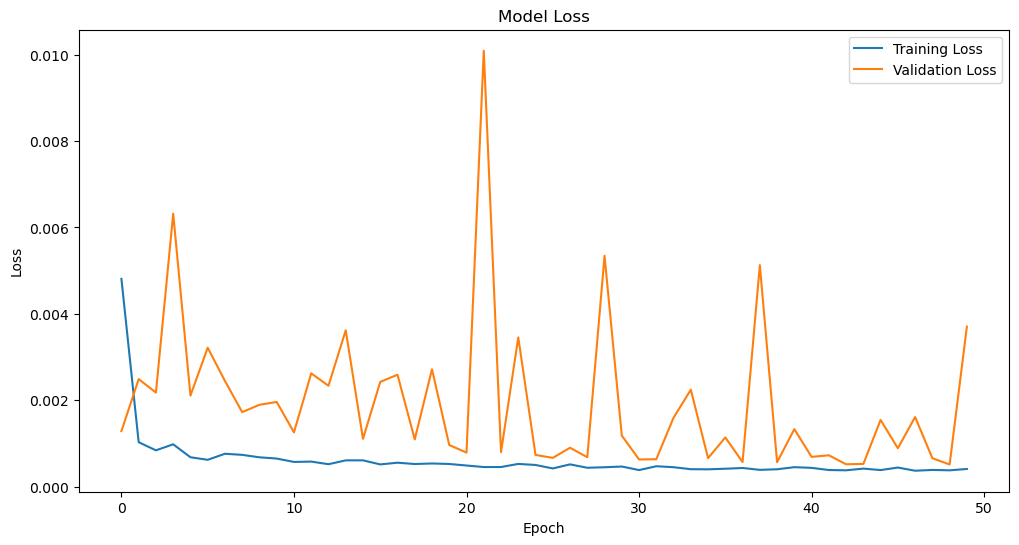

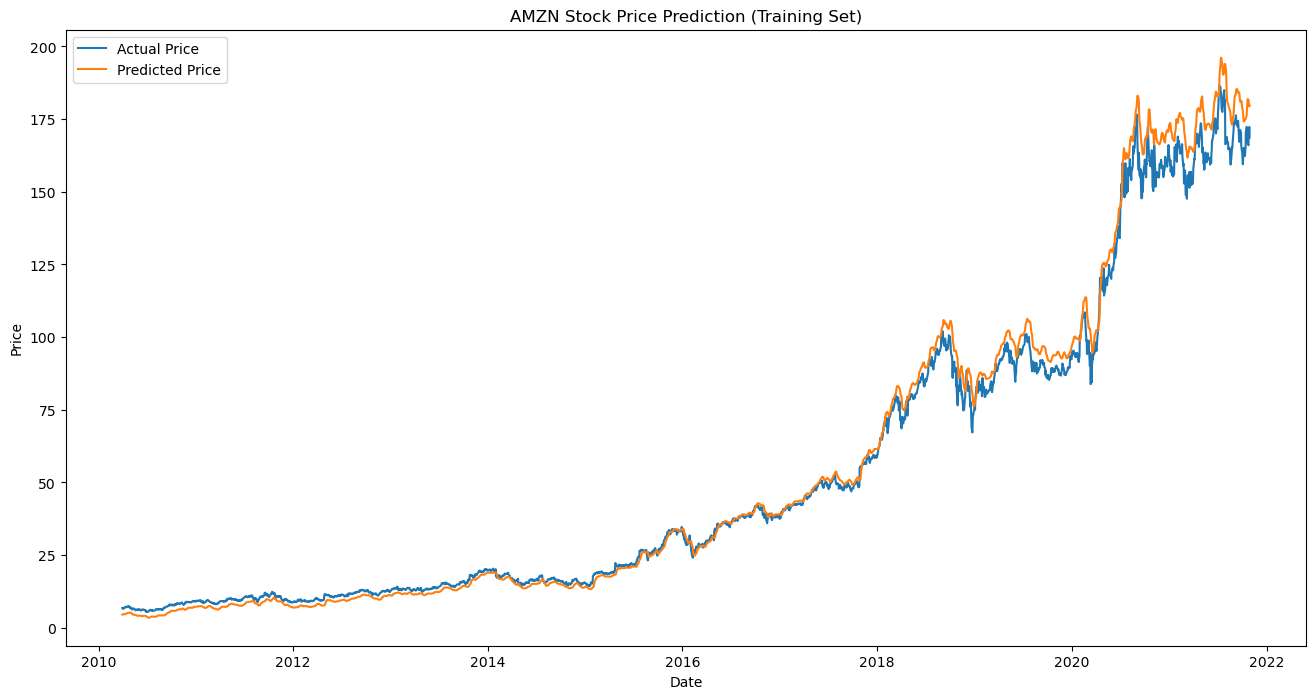

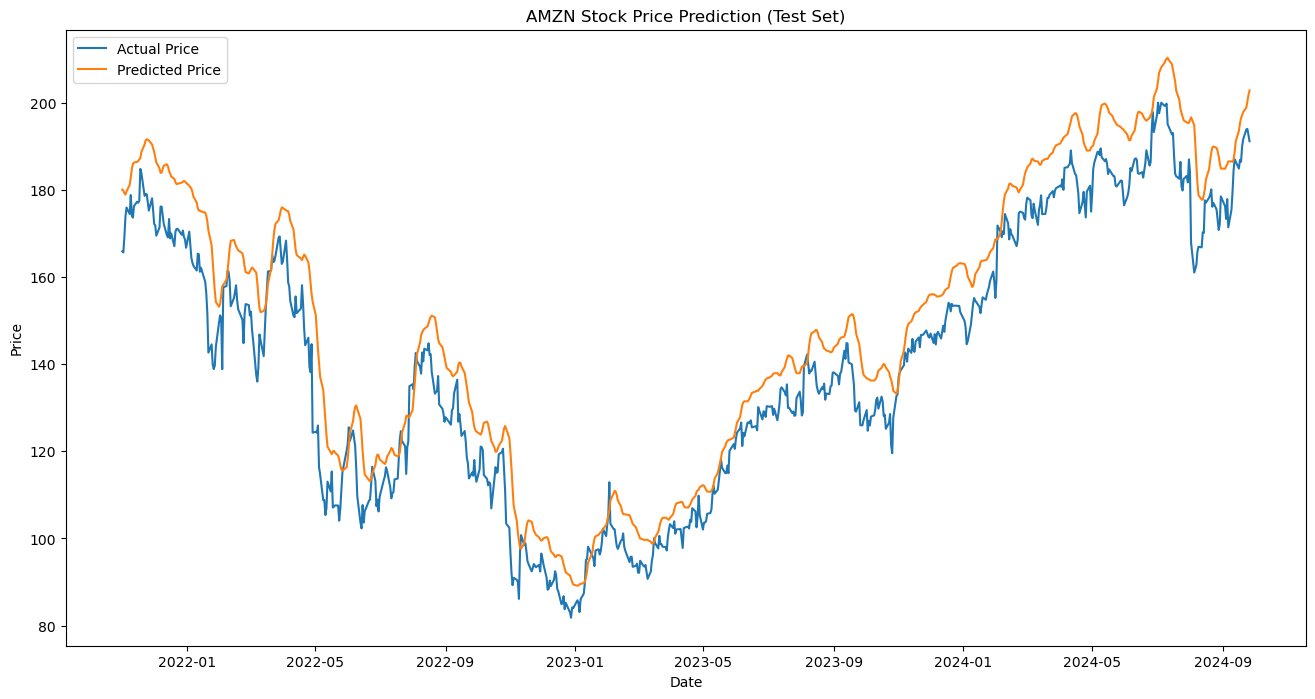

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

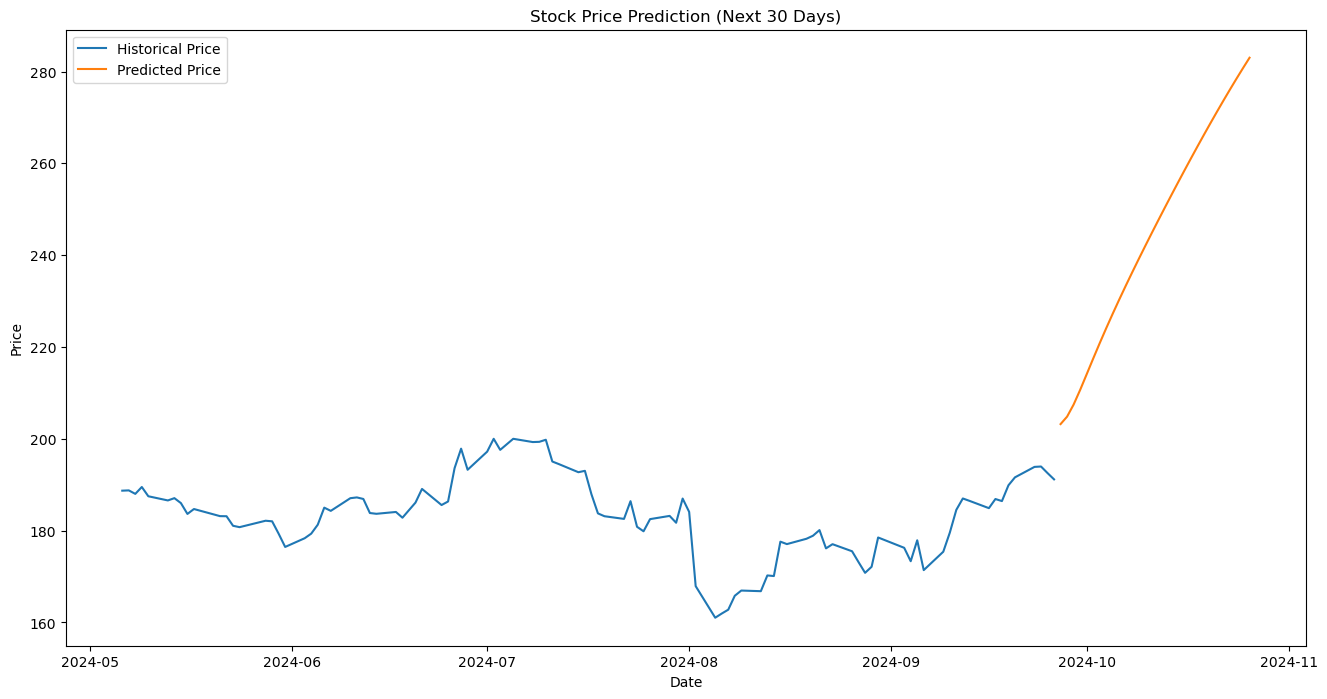

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
from datetime import datetime, timedelta

def download_stock_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)

def prepare_data(df, column='Close'):
    data = df[column].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

def build_model(input_shape):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def train_model(model, X_train, y_train, epochs, batch_size, validation_split):
    return model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=1)

def predict_next_n_days(model, last_sequence, scaler, n_days):
    next_n_days = []
    for _ in range(n_days):
        next_pred = model.predict(last_sequence.reshape(1, last_sequence.shape[0], 1))
        next_n_days.append(next_pred[0, 0])
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[-1] = next_pred
    return scaler.inverse_transform(np.array(next_n_days).reshape(-1, 1))

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_predictions(df, y_true, y_pred, title, start_index):
    plt.figure(figsize=(16, 8))
    
    # Ensure y_true and y_pred have the same shape
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    
    # Adjust the index to match the length of y_true and y_pred
    index = df.index[start_index:start_index + len(y_true)]
    
    plt.plot(index, y_true, label='Actual Price')
    plt.plot(index, y_pred, label='Predicted Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def plot_future_predictions(df, next_n_days, n_days):
    future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_days)
    plt.figure(figsize=(16, 8))
    plt.plot(df.index[-100:], df['Close'].values[-100:], label='Historical Price')
    plt.plot(future_dates, next_n_days, label='Predicted Price')
    plt.title(f'Stock Price Prediction (Next {n_days} Days)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def stock_price_prediction(ticker, start_date, end_date, sequence_length, train_split, epochs, batch_size, validation_split, future_days):
    df = download_stock_data(ticker, start_date, end_date)
    scaled_data, scaler = prepare_data(df)
    X, y = create_sequences(scaled_data, sequence_length)
    train_size = int(len(X) * train_split)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    model = build_model((X_train.shape[1], 1))
    history = train_model(model, X_train, y_train, epochs, batch_size, validation_split)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    train_mse = mean_squared_error(y_train_inv, train_predictions)
    train_mae = mean_absolute_error(y_train_inv, train_predictions)
    test_mse = mean_squared_error(y_test_inv, test_predictions)
    test_mae = mean_absolute_error(y_test_inv, test_predictions)
    print(f"Train MSE: {train_mse:.2f}")
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MSE: {test_mse:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    plot_training_history(history)
    plot_predictions(df, y_train_inv, train_predictions, f'{ticker} Stock Price Prediction (Training Set)', sequence_length)
    plot_predictions(df, y_test_inv, test_predictions, f'{ticker} Stock Price Prediction (Test Set)', train_size + sequence_length)
    last_sequence = scaled_data[-sequence_length:]
    next_n_days = predict_next_n_days(model, last_sequence, scaler, future_days)
    plot_future_predictions(df, next_n_days, future_days)
    return model, scaler, df, next_n_days

# Set parameters for Amazon stock prediction
ticker = "AMZN"
start_date = "2010-01-01"

# Get today's date
today = datetime.now()

# If it's before market close (assuming 4 PM EST), use yesterday's date
if today.hour < 16:  # 16 is 4 PM in 24-hour format
    end_date = (today - timedelta(days=1)).strftime('%Y-%m-%d')
else:
    end_date = today.strftime('%Y-%m-%d')

# If it's weekend, move back to Friday
while datetime.strptime(end_date, '%Y-%m-%d').weekday() > 4:  # 5 and 6 are Saturday and Sunday
    end_date = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=1)).strftime('%Y-%m-%d')

print(f"Using end date: {end_date}")

sequence_length = 60
train_split = 0.8
epochs = 50
batch_size = 32
validation_split = 0.1
future_days = 30

# Run the stock price prediction
model, scaler, df, next_n_days = stock_price_prediction(
    ticker,
    start_date,
    end_date,
    sequence_length,
    train_split,
    epochs,
    batch_size,
    validation_split,
    future_days
)

In [8]:
def selling_advice(df, next_n_days):
    current_price = df['Close'].iloc[-1]
    future_prices = next_n_days.flatten()
    max_future_price = np.max(future_prices)
    min_future_price = np.min(future_prices)
    
    print(f"Current price: ${current_price:.2f}")
    print(f"Predicted maximum price in next {len(future_prices)} days: ${max_future_price:.2f}")
    print(f"Predicted minimum price in next {len(future_prices)} days: ${min_future_price:.2f}")
    
    if max_future_price > current_price * 1.05:  # 5% increase
        print("Advice: Consider holding. The model predicts a potential significant increase in price.")
    elif min_future_price < current_price * 0.95:  # 5% decrease
        print("Advice: Consider selling. The model predicts a potential significant decrease in price.")
    else:
        print("Advice: The model doesn't predict significant changes. Consider holding and monitoring the market.")
    
    print("\nRemember: This advice is based on a predictive model and should not be the sole basis for investment decisions. Always consider other factors and consult with a financial advisor.")

selling_advice(df, next_n_days)

Current price: $191.16
Predicted maximum price in next 30 days: $283.02
Predicted minimum price in next 30 days: $203.20
Advice: Consider holding. The model predicts a potential significant increase in price.

Remember: This advice is based on a predictive model and should not be the sole basis for investment decisions. Always consider other factors and consult with a financial advisor.
